<a href="https://colab.research.google.com/github/LoreBonora/Olist/blob/main/Explora%C3%A7%C3%A3o_do_Olist_Lore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -U gitly

     |████████████████████████████████| 13.2MB 306kB/s 
     |████████████████████████████████| 74.6MB 46kB/s 
  Created wheel for gitly: filename=gitly-1.1.4-cp36-none-any.whl size=4520 sha256=820f1de0cc1db81c84f49d348b92b955330facfc542e915f324fe10640d0b0fd
  Stored in directory: /root/.cache/pip/wheels/41/5c/0b/6cd3a688991c83f17c948adf0775f7907a0406d1119bd809af
Successfully built gitly
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
!pip install pycep-correios

     |████████████████████████████████| 102kB 4.5MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 


In [99]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter('github')
gitly.config_render(renderer='github')

# Carregar CSVs

In [6]:
import pandas as pd

In [7]:
df_clientes = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_sellers_dataset.csv')

# Exploração das tabelas

## Clientes - olist_customers_dataset

In [8]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


### Info - Estrutura da tabela

In [9]:
#(linhas, colunas)
df_clientes.shape

(99441, 5)

In [10]:
# valores unicos em cada coluna
df_clientes.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [11]:
# nunique = qtd. valores unicos na coluna
# count = qtd. valores n]ao nulos na coluna
# size = qtd. de elemetos
df_clientes.agg( ['nunique', 'count', 'size'] )

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
nunique,99441,96096,14994,4119,27
count,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441


### Info - Negócio

In [12]:
df_clientes.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [13]:
# Quantos clientes unicos
print( 'Qtd. de clientes únicos', df_clientes.customer_unique_id.nunique())

Qtd. de clientes únicos 96096


In [14]:
# Valeu Lore!
df_clientes_unique = df_clientes.drop_duplicates('customer_unique_id', keep='first')
df_clientes_unique.shape

(96096, 5)

In [15]:
df_clientes_unique.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Top 5 **estados**

In [16]:
df_top5_estados = df_clientes_unique.customer_state.value_counts().head(5)
df_top5_estados

SP    40295
RJ    12377
MG    11255
RS     5277
PR     4882
Name: customer_state, dtype: int64

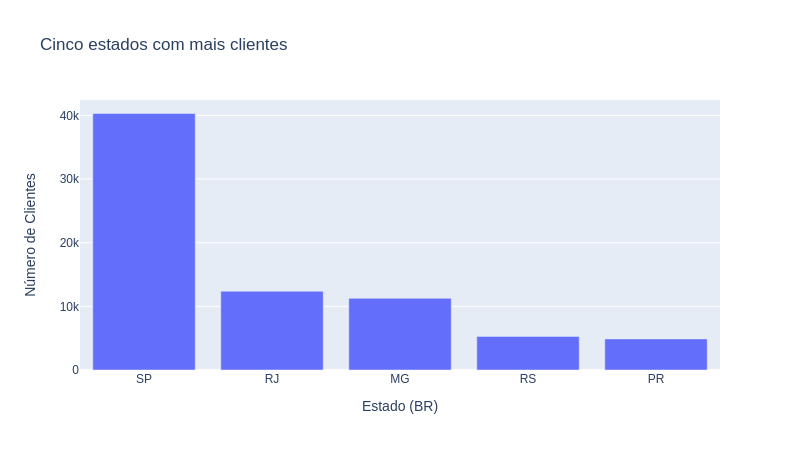

In [100]:
import plotly.express as px

fig = px.bar(df_top5_estados, y='customer_state', title='Cinco estados com mais clientes', labels={'customer_state': 'Número de Clientes', 'index':'Estado (BR)'})
gitly.show( fig )

Top 5 **cidades**

In [18]:
df_top5_cidade = df_clientes_unique.customer_city.value_counts().head(5)
df_top5_cidade

sao paulo         14971
rio de janeiro     6611
belo horizonte     2671
brasilia           2066
curitiba           1462
Name: customer_city, dtype: int64

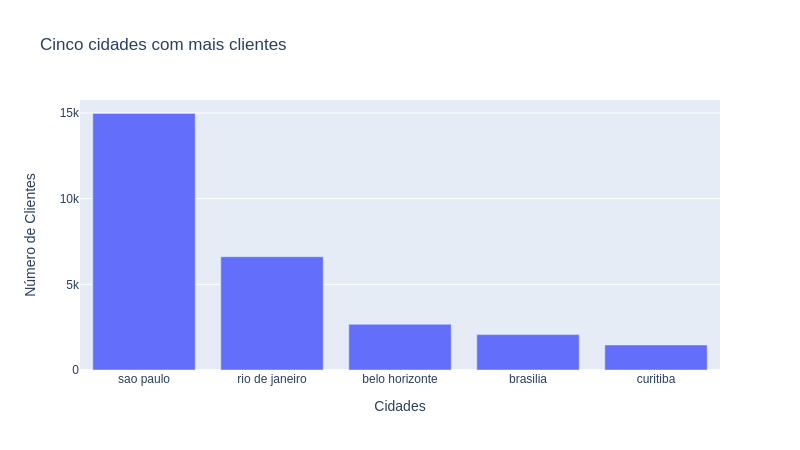

In [101]:
fig = px.bar(df_top5_cidade, y='customer_city', title='Cinco cidades com mais clientes', labels={'customer_city': 'Número de Clientes', 'index':'Cidades'})
gitly.show( fig )

Discussão

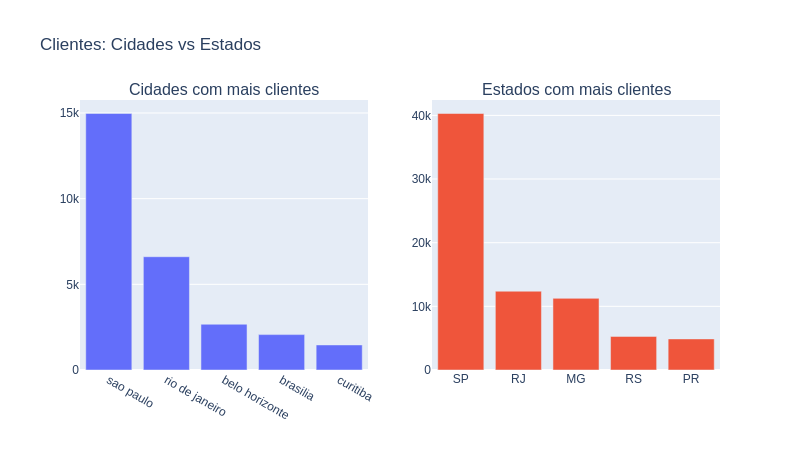

In [102]:
from plotly.subplots import make_subplots

fig = make_subplots( rows=1, cols=2, column_titles= ['Cidades com mais clientes', 'Estados com mais clientes'] )

fig.add_bar( x=df_top5_cidade.index , y=df_top5_cidade, row=1, col=1 )
fig.add_bar( x=df_top5_estados.index, y=df_top5_estados, row=1, col=2 )
fig.update_layout( dict( {'title':'Clientes: Cidades vs Estados'} ) )
fig.update_layout( dict( {'showlegend':False} ) )
gitly.show(fig)

Top 4 - Bairro/Distrito - Número de clientes

In [21]:
df_clientes_unique.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [22]:
df_top4_bairros = df_clientes_unique.customer_zip_code_prefix.value_counts().head(4).rename('qtd_clientes_bairro').reset_index()
df_top4_bairros

,index,qtd_clientes_bairro
0,22790,136
1,22793,119
2,24220,113
3,24230,112


In [23]:
# fonte https://imasters.com.br/back-end/python-consulta-de-cep-com-pycepcorreios
import pycep_correios

def bairro_cidade( cep ):
    end = pycep_correios.get_address_from_cep( str( cep ) + '000' )
    return '{} / {}'.format(end['bairro'], end['cidade'])

df_top4_bairros['distrito'] = df_top4_bairros['index'].apply( bairro_cidade )
df_top4_bairros

,index,qtd_clientes_bairro,distrito
0,22790,136,Recreio dos Bandeirantes / Rio de Janeiro
1,22793,119,Barra da Tijuca / Rio de Janeiro
2,24220,113,Icaraí / Niterói
3,24230,112,Icaraí / Niterói


## Produtos - olist_products_dataset

In [24]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


### Info - Estrutura

In [25]:
df_produtos.shape

(32951, 9)

In [26]:
# nunique = qtd. valores unicos na coluna
# count = qtd. valores não nulos na coluna
# size = qtd. de elemetos
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,73,66,2960,19,2204,99,102,95
count,32951,32341,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


In [27]:
df_produtos.product_category_name.fillna(value='nao informado', inplace=True)
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,74,66,2960,19,2204,99,102,95
count,32951,32951,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


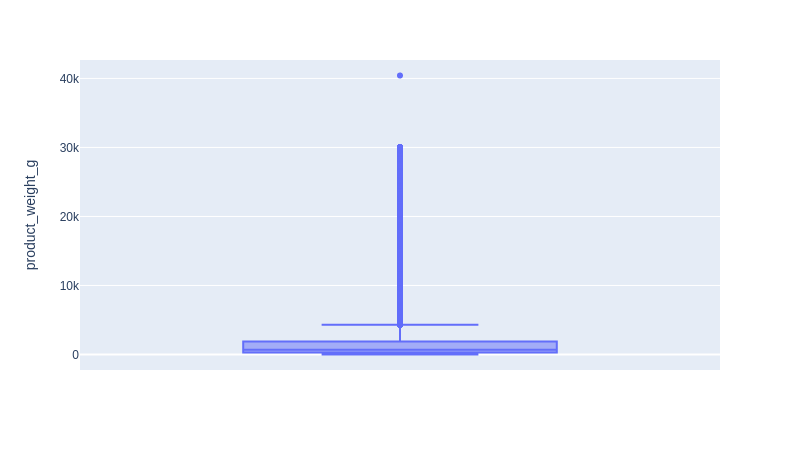

In [103]:
# Como esta a distribuição?
fig = px.box(df_produtos.product_weight_g, y="product_weight_g")
gitly.show(fig)

In [29]:
df_produtos.product_weight_g.median()

700.0

In [30]:
df_produtos.product_weight_g.mean()

2276.4724877841513

In [31]:
#df_produtos.fillna(method='ffil')
#df_produtos.fillna(value=0)
valor = df_produtos.product_weight_g.median()
df_produtos.product_weight_g.fillna(value=valor, inplace=True)

### Info - Negócio

In [32]:
df_produtos.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [33]:
df_categoria_mais_vendidas = df_produtos.product_category_name.value_counts().head(5).rename('qtd_prod_cat_ofertados')
df_categoria_mais_vendidas

cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: qtd_prod_cat_ofertados, dtype: int64

In [34]:
import numpy as np

df_peso_medio_produtos = df_produtos.groupby( by='product_category_name' ).apply(np.mean)['product_weight_g']
df_peso_medio_produtos

product_category_name
agro_industria_e_comercio    5263.405405
alimentos                     923.414634
alimentos_bebidas            1307.932692
artes                        1691.763636
artes_e_artesanato           1164.578947
                                ...     
sinalizacao_e_seguranca      2969.817204
tablets_impressao_imagem      381.444444
telefonia                     236.506173
telefonia_fixa                660.827586
utilidades_domesticas        3020.793576
Name: product_weight_g, Length: 74, dtype: float64

In [35]:
df_mais_vendidos_peso_medio =  pd.merge(left=df_categoria_mais_vendidas, right=df_peso_medio_produtos, how='left', left_index=True, right_index=True)
df_mais_vendidos_peso_medio

,qtd_prod_cat_ofertados,product_weight_g
cama_mesa_banho,3029,2456.405084
esporte_lazer,2867,2024.670736
moveis_decoracao,2657,3008.266842
beleza_saude,2444,1434.793781
utilidades_domesticas,2335,3020.793576


## Compras - olist_orders_dataset

In [36]:
df_compras.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


### Info - Estrutura

In [37]:
df_compras.shape

(99441, 8)

In [38]:
df_compras.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99281,97658,96476,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [39]:
df_compras.fillna( method='ffill', inplace=True ) # Melhorem isso aqui!
df_compras.agg(['nunique','count','size'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
nunique,99441,99441,8,98875,90733,81018,95664,459
count,99441,99441,99441,99441,99441,99441,99441,99441
size,99441,99441,99441,99441,99441,99441,99441,99441


In [40]:
df_compras.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

### Info - Negócio

In [41]:
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [42]:
df_compras.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [43]:
df_status = df_compras.order_status.value_counts()
df_status

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

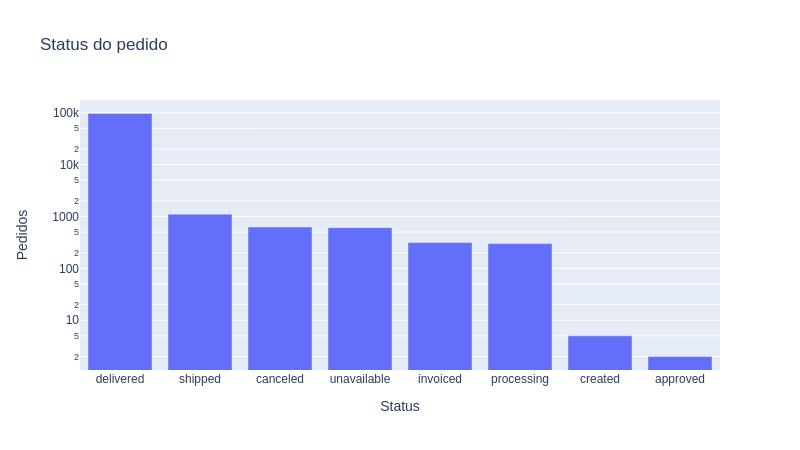

In [104]:
fig = px.bar(df_status, y='order_status', title='Status do pedido', log_y=True, labels={'order_status': 'Pedidos', 'index':'Status'})
gitly.show( fig )

### Data

In [45]:
df_compras.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [46]:
df_compras_dt = df_compras[['order_id', 'customer_id', 'order_status']].copy()
df_compras_dt.head(3)

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered


In [47]:
# demonstração
pd.to_datetime( df_compras['order_purchase_timestamp'], format='%Y-%m-%d')

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [48]:
lista_colunas_datas = list( df_compras.iloc[:1, 3:].columns )
lista_colunas_datas

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [49]:
for coluna in lista_colunas_datas:
    df_compras_dt[coluna] = pd.to_datetime( df_compras[coluna], format='%Y-%m-%d')

df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [50]:
df_compras_dt.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [51]:
df_compras_dt.iloc[0,:]

order_id                         e481f51cbdc54678b7cc49136f2d6af7
customer_id                      9ef432eb6251297304e76186b10a928d
order_status                                            delivered
order_purchase_timestamp                      2017-10-02 10:56:33
order_approved_at                             2017-10-02 11:07:15
order_delivered_carrier_date                  2017-10-04 19:55:00
order_delivered_customer_date                 2017-10-10 21:25:13
order_estimated_delivery_date                 2017-10-18 00:00:00
Name: 0, dtype: object

Eficiência na entrega

In [52]:
em_tempo = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).sum()
em_tempo

89996

In [53]:
total = (df_compras_dt.order_delivered_customer_date <= df_compras_dt.order_estimated_delivery_date).count()
total

99441

In [54]:
atrasados = total - em_tempo
atrasados

9445

In [106]:
fig = px.pie( values=[em_tempo, atrasados], names=['Dentro do Estimado','Atrasados'], title='Eficiência na Entrega')
fig.show()

In [56]:
df_compras_dt.head(3)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [57]:
df_compras_dt['delivery_interval'] = df_compras_dt.order_delivered_customer_date - df_compras_dt.order_purchase_timestamp
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40


In [58]:
df_compras_dt['numeric_month'] =  df_compras_dt.order_purchase_timestamp.dt.month
df_compras_dt['month'] =  df_compras_dt.order_purchase_timestamp.dt.month_name()
df_compras_dt['year'] =  df_compras_dt.order_purchase_timestamp.dt.year
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018


In [59]:
df_compras_dt['days_delivery_interval'] = df_compras_dt.delivery_interval.dt.days
df_compras_dt.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_interval,numeric_month,month,year,days_delivery_interval
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8 days 10:28:40,10,October,2017,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13 days 18:46:08,7,July,2018,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 09:27:40,8,August,2018,9


In [60]:
df_compras_mes =  df_compras_dt[['numeric_month','year','days_delivery_interval' ]].groupby( by='numeric_month' ).apply(np.mean)
df_compras_mes

,numeric_month,year,days_delivery_interval
numeric_month,,,
1,1.0,2017.900855,14.787334
2,2.0,2017.790785,19.312412
3,3.0,2017.728899,17.794198
4,4.0,2017.742695,13.106069
5,5.0,2017.650052,13.075381
6,6.0,2017.655227,11.290374
7,7.0,2017.609808,10.002326
8,8.0,2017.600572,7.801162
9,9.0,2017.002787,13.654588


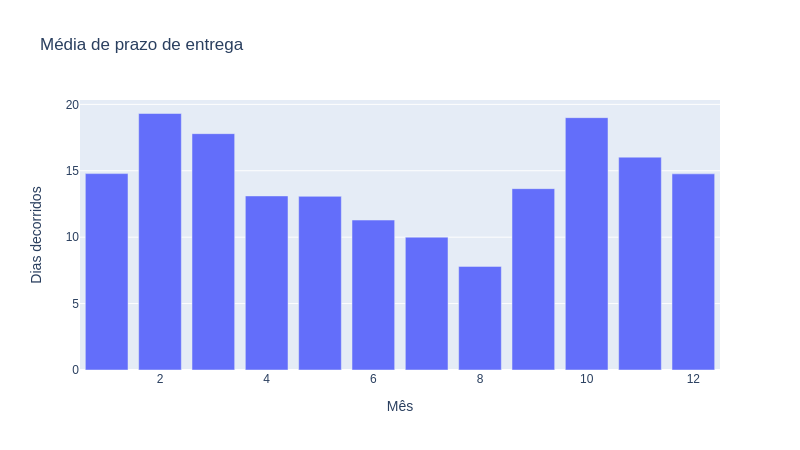

In [107]:
fig = px.bar(df_compras_mes, y='days_delivery_interval', title='Média de prazo de entrega', labels={'days_delivery_interval': 'Dias decorridos', 'index':'Mês'})
gitly.show( fig )

In [62]:
df_n_compras_mes = df_compras_dt.numeric_month.value_counts()
df_n_compras_mes_plot = df_n_compras_mes.reset_index().sort_values(by='index', ascending=True)
df_n_compras_mes_plot

,index,numeric_month
7,1,8069
6,2,8508
3,3,9893
5,4,9343
1,5,10573
4,6,9412
2,7,10318
0,8,10843
11,9,4305
10,10,4959


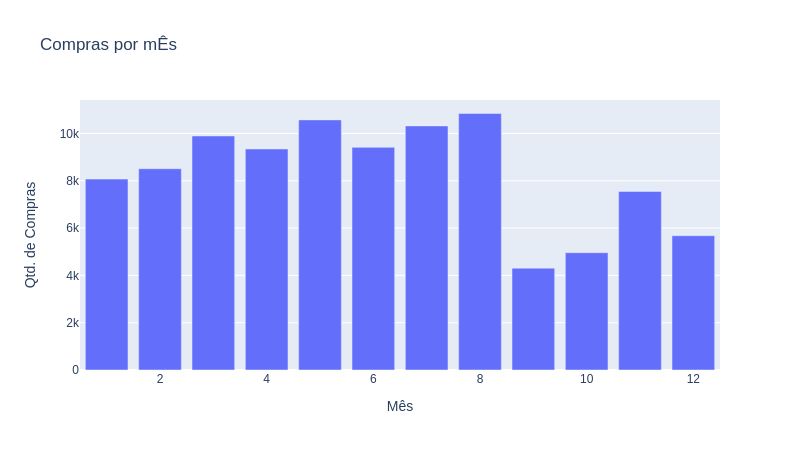

In [108]:
fig = px.bar(df_n_compras_mes_plot, x ='index' , y='numeric_month', title='Compras por mÊs', labels={'numeric_month': 'Qtd. de Compras', 'index':'Mês'})
gitly.show( fig )

In [64]:
df_compras_dt.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [65]:
df_compras_dt.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

## Compras_Itens - olist_order_items_dataset.csv

### Info - Estrutura

In [66]:
df_compra_itens.shape

(112650, 7)

In [67]:
df_compra_itens.agg(['nunique','count','size'])

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
nunique,98666,21,32951,3095,93318,5968,6999
count,112650,112650,112650,112650,112650,112650,112650
size,112650,112650,112650,112650,112650,112650,112650


### Info Negócio

In [68]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Perguntas:
- Qual o produto mais vendido?
- **O frete do produto mais vendido muda de acordo com a região?**
- Qual o frete médio do produto mais vendido?
- Qual o top 5 vendedores?
- Quais produtos que os top 5 vendedores mais vendem?
- Variação de preço ao longo do tempo.
- Qual produto fatura mais?
- Venda de produto x Ano (top 5?)
- Volume de dinheiro em transações ao longo dos meses.
----------------------------------------------
Responder
- Qual o produto mais vendido?
- Qual o frete médio do produto mais vendido?
- Qual produto fatura mais?
- Qual o top 5 vendedores?
----------------------------------------------
Para casa:
- Variação de preço ao longo do tempo.
- Venda de produto x Ano (top 5?)
- Volume de dinheiro em transações ao longo dos meses.


#### Qual o produto mais vendido?

In [69]:
# Errado
df_compra_itens.product_id.value_counts().head(5)

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: product_id, dtype: int64

In [70]:
df_compra_itens[['product_id', 'order_item_id' ]].groupby(by='product_id').apply(sum)['order_item_id']

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
00088930e925c41fd95ebfe695fd2655    1
0009406fd7479715e4bef61dd91f2462    1
000b8f95fcb9e0096488278317764d19    2
000d9be29b5207b54e86aa1b1ac54872    1
                                   ..
fff6177642830a9a94a0f2cba5e476d1    2
fff81cc3158d2725c0655ab9ba0f712c    1
fff9553ac224cec9d15d49f5a263411f    1
fffdb2d0ec8d6a61f0a0a0db3f25b441    5
fffe9eeff12fcbd74a2f2b007dde0c58    1
Name: order_item_id, Length: 32951, dtype: int64

In [71]:
# Certo
df_prod_mais_v = df_compra_itens[['product_id', 'order_item_id' ]].groupby(by='product_id').apply(sum)['order_item_id']
df_prod_mais_v.head()

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
00088930e925c41fd95ebfe695fd2655    1
0009406fd7479715e4bef61dd91f2462    1
000b8f95fcb9e0096488278317764d19    2
000d9be29b5207b54e86aa1b1ac54872    1
Name: order_item_id, dtype: int64

In [72]:
df_prod_mais_v.sort_values(ascending=False).head(5)

product_id
422879e10f46682990de24d770e7f83d    793
aca2eb7d00ea1a7b8ebd4e68314663af    640
368c6c730842d78016ad823897a372db    551
53759a2ecddad2bb87a079a1f1519f73    545
99a4788cb24856965c36a24e339b6058    542
Name: order_item_id, dtype: int64

#### Qual o frete médio do produto mais vendido?

In [73]:
df_prod_mais_v.sort_values(ascending=False).index[0]

'422879e10f46682990de24d770e7f83d'

In [74]:
prod_mais = df_prod_mais_v.sort_values(ascending=False).index[0]
df_prod_mais_vendido = df_compra_itens[ df_compra_itens.product_id == prod_mais ]
df_prod_mais_vendido.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.90,0.00
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.90,0.00
775,01c4f4e08d9e8b7c5bd47e612285993f,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 04:30:35,49.00,13.41
869,0204196a1fd266bdc00356eb791b4516,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 18:54:28,49.00,17.64
870,0204196a1fd266bdc00356eb791b4516,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 18:54:28,49.00,17.64
1002,02556030d826438ef986ab5fd723a9a5,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-02-16 10:48:11,49.90,19.59
1003,02556030d826438ef986ab5fd723a9a5,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-02-16 10:48:11,49.90,19.59
1068,027ae252d37e5527c2e109e268b222e2,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-24 22:18:42,53.90,14.47
1161,02b2c02d27d60c0e658675335ca80216,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-08-10 13:10:18,59.90,17.67
1340,03202c9906e9d1140a8ac3e15f4492e8,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-08-09 04:44:41,49.91,20.99


In [75]:
df_prod_mais_vendido.freight_value.describe()

count    484.000000
mean      15.752149
std        8.358141
min        0.000000
25%       13.430000
50%       17.630000
75%       17.670000
max       83.270000
Name: freight_value, dtype: float64

In [109]:
fig = px.box(df_prod_mais_vendido, y="freight_value")
fig.show()

#### Qual produto fatura mais?

In [77]:
df_compra_itens['valor_final'] = df_compra_itens.order_item_id * df_compra_itens.price
df_compra_itens.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90


In [78]:
df_prod_mais_f = df_compra_itens[['product_id', 'order_item_id', 'valor_final' ]].groupby(by=['product_id']).apply(sum)[['valor_final', 'order_item_id']]
df_prod_mais_f.head()

,valor_final,order_item_id
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,101.65,1
00088930e925c41fd95ebfe695fd2655,129.90,1
0009406fd7479715e4bef61dd91f2462,229.00,1
000b8f95fcb9e0096488278317764d19,117.80,2
000d9be29b5207b54e86aa1b1ac54872,199.00,1


In [79]:
df_prod_mais_f.sort_values(by=['valor_final'] ,ascending=False).head(5)

,valor_final,order_item_id
product_id,,
bb50f2e236e5eea0100680137654686c,70485.00,215
5769ef0a239114ac3a854af00df129e4,60480.00,36
6cdd53843498f92890544667809f1595,57557.60,164
d1c427060a0f73f6b889a5c7c61f2ac4,50940.39,369
d6160fb7873f184099d9bc95e30376af,48899.34,35


#### Qual o top 5 vendedores (+vendem)?

In [80]:
# Transações
df_compra_itens.groupby( by=['seller_id'] ).count().sort_values(by=['order_id'], ascending=False).head(5)

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,valor_final
seller_id,,,,,,,
6560211a19b47992c3666cc44a7e94c0,2033,2033,2033,2033,2033,2033,2033
4a3ca9315b744ce9f8e9374361493884,1987,1987,1987,1987,1987,1987,1987
1f50f920176fa81dab994f9023523100,1931,1931,1931,1931,1931,1931,1931
cc419e0650a3c5ba77189a1882b7556a,1775,1775,1775,1775,1775,1775,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551,1551,1551,1551,1551,1551,1551


In [81]:
# Transações
df_compra_itens.seller_id.value_counts().head(5)

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: seller_id, dtype: int64

In [82]:
# Quem vendeu mais produtos
df_compra_itens.groupby( by=['seller_id'] ).apply( sum ).sort_values(by=['order_item_id'], ascending=False).head(5)['order_item_id']

seller_id
1f50f920176fa81dab994f9023523100    2898
1025f0e2d44d7041d6cf58b6550e0bfa    2290
4a3ca9315b744ce9f8e9374361493884    2269
6560211a19b47992c3666cc44a7e94c0    2261
7c67e1448b00f6e969d365cea6b010ab    2172
Name: order_item_id, dtype: int64

# Relacionamento entre tabelas

Perguntas:
- Top 5 categorias mais vendidas?
- Quanto cada categoria participa no faturamento total (%)?
- Existe relação entre o peso e o frete?


## Top 5 categorias mais vendidas (unidades vendidas)?

In [83]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [84]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,valor_final
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,239.9
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,199.0


In [85]:
df_left = df_compra_itens[['order_item_id', 'product_id']]
df_left.head(3)

,order_item_id,product_id
0,1,4244733e06e7ecb4970a6e2683c13e61
1,1,e5f2d52b802189ee658865ca93d83a8f
2,1,c777355d18b72b67abbeef9df44fd0fd


In [86]:
df_right = df_produtos[['product_id', 'product_category_name']]
df_right.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [87]:
df_categorias_vendas = pd.merge(df_left, df_right, how='left', on='product_id')
df_categorias_vendas.head()

,order_item_id,product_id,product_category_name
0,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,1,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,1,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao
3,1,7634da152a4610f1595efa32f14722fc,perfumaria
4,1,ac6c3623068f30de03045865e4e10089,ferramentas_jardim


In [88]:
df_cat_total = df_categorias_vendas[['order_item_id', 'product_category_name']].groupby(by='product_category_name').sum()
df_cat_total

,order_item_id
product_category_name,
agro_industria_e_comercio,265
alimentos,609
alimentos_bebidas,365
artes,230
artes_e_artesanato,26
...,...
sinalizacao_e_seguranca,307
tablets_impressao_imagem,89
telefonia,5161


In [89]:
df_cat_total.sort_values(by='order_item_id', ascending=False).head(5)

,order_item_id
product_category_name,
cama_mesa_banho,13665
moveis_decoracao,11540
beleza_saude,11081
esporte_lazer,9932
informatica_acessorios,9874


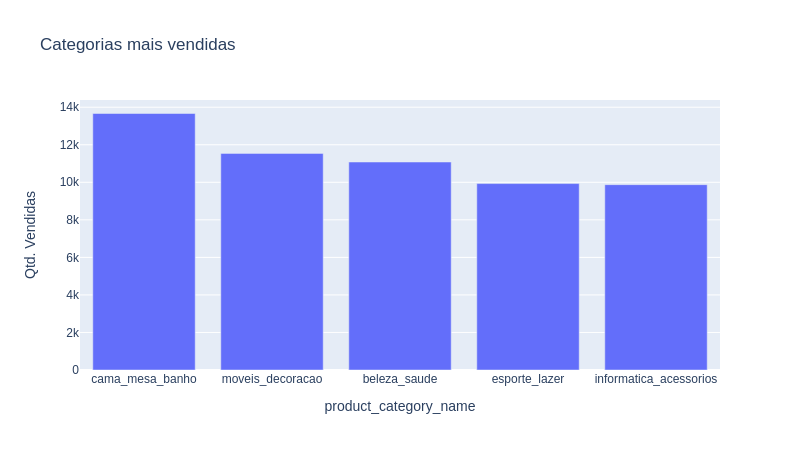

In [110]:
df_plot = df_cat_total.sort_values(by='order_item_id', ascending=False).head(5)
fig = px.bar(df_plot, y='order_item_id', title='Categorias mais vendidas', labels={'order_item_id': 'Qtd. Vendidas', 'index':'Categoria'})
gitly.show( fig )

# Categorias com maior faturamento


In [91]:
df_left = df_compra_itens[['valor_final', 'product_id']]
df_left.head(3)

,valor_final,product_id
0,58.9,4244733e06e7ecb4970a6e2683c13e61
1,239.9,e5f2d52b802189ee658865ca93d83a8f
2,199.0,c777355d18b72b67abbeef9df44fd0fd


In [92]:
df_right = df_produtos[['product_id', 'product_category_name']]
df_right.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [93]:
df_categorias_fat = pd.merge(df_left, df_right, how='left', on='product_id')
df_categorias_fat.head()

,valor_final,product_id,product_category_name
0,58.90,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,239.90,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,199.00,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao
3,12.99,7634da152a4610f1595efa32f14722fc,perfumaria
4,199.90,ac6c3623068f30de03045865e4e10089,ferramentas_jardim


In [94]:
df_cat_fat_total = df_categorias_fat[['valor_final', 'product_category_name']].groupby(by='product_category_name').sum()
df_cat_fat_total

,valor_final
product_category_name,
agro_industria_e_comercio,91634.76
alimentos,33180.45
alimentos_bebidas,17797.63
artes,25366.09
artes_e_artesanato,1875.90
...,...
sinalizacao_e_seguranca,34797.13
tablets_impressao_imagem,8082.21
telefonia,360139.72


In [95]:
df_cat_fat_total.sort_values(by='valor_final', ascending=False).head(5)

,valor_final
product_category_name,
beleza_saude,1347468.49
relogios_presentes,1259634.58
cama_mesa_banho,1228795.46
informatica_acessorios,1135454.64
esporte_lazer,1082435.42


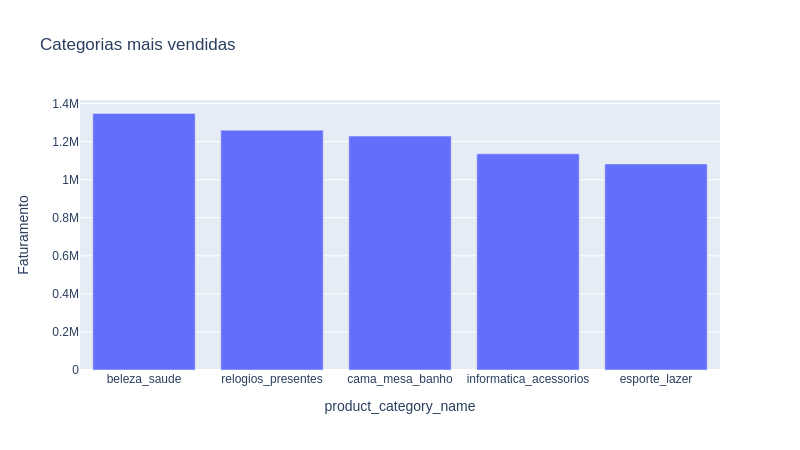

In [111]:
df_plot = df_cat_fat_total.sort_values(by='valor_final', ascending=False).head(5)
fig = px.bar(df_plot, y='valor_final', title='Categorias mais vendidas', labels={'valor_final': 'Faturamento', 'index':'Categoria'})
gitly.show( fig )